Boynton's HRF model is the following (see also [nitime's page](http://nipy.org/nitime/api/generated/nitime.fmri.hrf.html)).

$$
h(t) = \left(\frac{t - \delta}{\tau}\right)^{n-1} e^{-(t/\tau)} \cdot \frac{1}{\tau(n-1)!}
$$

default parameters are 

$$
\tau = 1.08\\
n = 3 \\
\delta=2.05
$$

In [1]:
import numpy as np

In [2]:
def boynton(duration, tau=1.08, n=3, delta=2.05, TR=1):
    n_samples = int(duration // TR)
    t = np.linspace(0, duration, n_samples)
    hrf = ((t - delta)/tau)**(n-1) * np.exp(-t/tau) * 1/(tau * np.math.factorial(n-1))
    hrf /= hrf.max()
    return t, hrf

In [3]:
t, hrf = boynton(20, TR=0.1, delta=0)

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import os

In [6]:
FIG_DIR = os.path.abspath("../figures/example-fir-model")
os.makedirs(FIG_DIR, exist_ok=True)

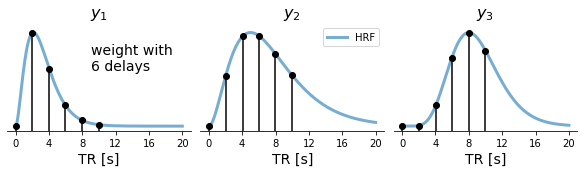

In [167]:
fig, axs = plt.subplots(1, 3, figsize=(8, 2.3), constrained_layout=True)
params = [
    dict(TR=0.1, delta=0),
    dict(TR=0.1, delta=0, tau=2.5),
    dict(TR=0.1, delta=0, n=9, tau=1)
]
duration = 20

for i, (ax, pps) in enumerate(zip(axs.flat, params), 1):
    t, hrf = boynton(duration, **pps)
    ax.plot(t, hrf, color='tab:blue', label="HRF", linewidth=3, alpha=0.6);
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, duration+1, 4))
    for tr in np.arange(0, 11, 2):
        idx = np.argmin(np.abs((t - tr)))
        ax.plot([t[idx], t[idx]], [-1, hrf[idx]], color='k')
        ax.plot(t[idx], hrf[idx], '.', markersize=12, color='k')
#         if i == 1:
#             ax.text(
#                 t[idx], 
#                 hrf[idx]+0.03, 
#                 r"$x_{{{tr}}}w_{{{tr}}}$".format(tr=int(tr/2 + 1)), 
#                 ha="left", 
#                 va="bottom",
#                 fontsize=10
#             )
    ax.set_xlabel("TR [s]", fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f"$y_{{{i}}}$", fontsize=16)
    ax.set_ylim([-0.05, 1.1])
axs[0].text(9, 0.6, "weight with\n6 delays", ha="left", fontsize=14)
axs[1].legend();

fig.savefig(
    f"{FIG_DIR}/example-fir-model2.png", 
    dpi=300, 
    # facecolor="white", 
    bbox_inches="tight"
)

In [8]:
from tikreg.utils import delay_signal
import numpy as np

In [94]:
X = np.zeros((10, 1))
X[0, 0] = .5
X = delay_signal(X, delays=range(6))

In [96]:
duration = 20
Ys = []
for pps in params:
    t, hrf = boynton(duration, **pps)
    Ys.append(hrf)
Ys = np.vstack(Ys)

In [97]:
Ys.shape

(3, 199)

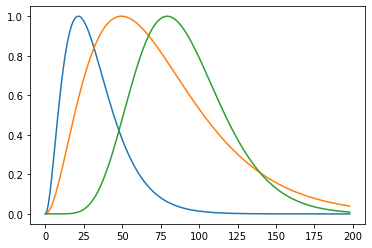

In [98]:
plt.plot(Ys.T)

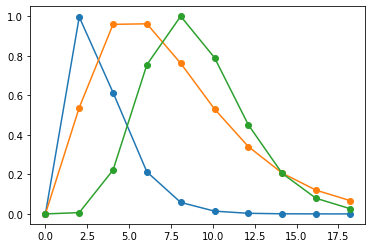

In [99]:
plt.plot(t[::20], Ys.T[::20], '.-', markersize=12);

In [126]:
Y = Ys.T[::20]

In [127]:
from scipy.linalg import lstsq

In [128]:
W, *_ = lstsq(X, Y)

In [129]:
X.shape, W.shape, Y.shape

((10, 6), (6, 3), (10, 3))

/home/jlg/mvdoc/miniconda3/envs/proj-pcan/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


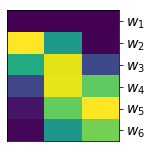

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2), constrained_layout=True)
ax.matshow(W)
ax.axis("auto")
ax.yaxis.tick_right()
ax.set_yticklabels([""] + [f"$w_{{{i}}}$" for i in range(1, 7)], fontsize=14)
ax.set_xticks([]);

fig.savefig(
    f"{FIG_DIR}/example-fir-model-W.png", 
    dpi=300, 
    # facecolor="white", 
    bbox_inches="tight"
)

/home/jlg/mvdoc/miniconda3/envs/proj-pcan/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


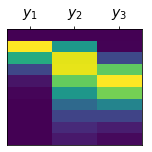

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2), constrained_layout=True)
ax.matshow(Y, cmap="viridis")
ax.axis("auto")
ax.yaxis.tick_right()
ax.set_yticks([])
ax.set_xticklabels([""] + [f"$y_{{{i}}}$" for i in range(1, 4)], fontsize=14);
plt.tick_params(axis='x', which='both', bottom=False)
fig.savefig(
    f"{FIG_DIR}/example-fir-model-Y.png", 
    dpi=300, 
    # facecolor="white", 
    bbox_inches="tight"
)

/home/jlg/mvdoc/miniconda3/envs/proj-pcan/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


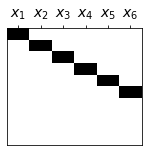

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2), constrained_layout=True)
ax.matshow(X, cmap="gray_r")
ax.axis("auto")
ax.yaxis.tick_right()
ax.set_yticks([])
ax.set_xticklabels([""] + [f"$x_{{{i}}}$" for i in range(1, 7)], fontsize=14);
plt.tick_params(axis='x', which='both', bottom=False)
fig.savefig(
    f"{FIG_DIR}/example-fir-model-X.png", 
    dpi=300, 
    # facecolor="white", 
    bbox_inches="tight"
)